In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
from skimage import img_as_float

# 1. Contrast Stretching

In [2]:
def Contrast_stretched (Y):
    Y_str = np.copy(Y)
    R1,G1,B1 = cv2.split(Y_str)
    R_str = ((R-np.min(R))/(np.max(R)-np.min(R)))*255
    G_str = ((G-np.min(G))/(np.max(G)-np.min(G)))*255
    B_str = ((B-np.min(B))/(np.max(B)-np.min(B)))*255
    Y_str[ : , : , 0] = R_str 
    Y_str[ : , : , 1] = G_str 
    Y_str[ : , : , 2] = B_str 
    return Y_str

# 2. Gray World Algorithm

In [3]:
def Gray_Algo (G):
    G_gray = np.copy(G)
    R1,G1,B1 = cv2.split(G_gray)
    H1 = G_gray.shape[0]
    W1 = G_gray.shape[1]
    spec_R = np.sum(R1)/(H1*W1)
    spec_G = np.sum(G1)/(H1*W1)
    spec_B = np.sum(B1)/(H1*W1)
    scale = (spec_R+spec_G+spec_B)/3
    #average values of each channel
    R_ave = (np.sum(R1)/(R1.shape[0]*R1.shape[1]))
    G_ave = (np.sum(G1)/(G1.shape[0]*G1.shape[1]))
    B_ave = (np.sum(B1)/(B1.shape[0]*B1.shape[1]))
    #white-balanced channels
    R_wb = (R1/R_ave)*scale
    G_wb = (G1/G_ave)*scale
    B_wb = (B1/B_ave)*scale
    G_gray[ : , : , 0] = R_wb
    G_gray[ : , : , 1] = G_wb
    G_gray[ : , : , 2] = B_wb
    return G_gray
    

## RESULTS

## Original Image

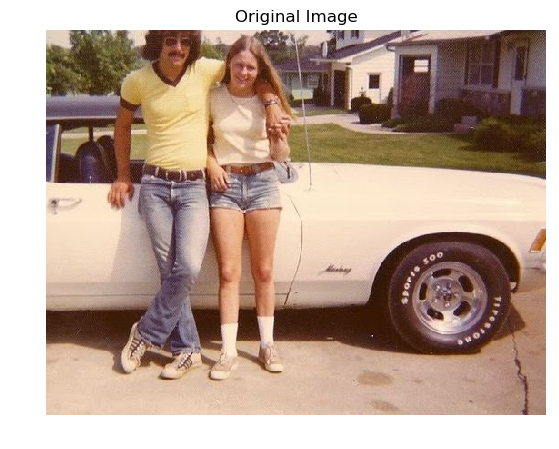

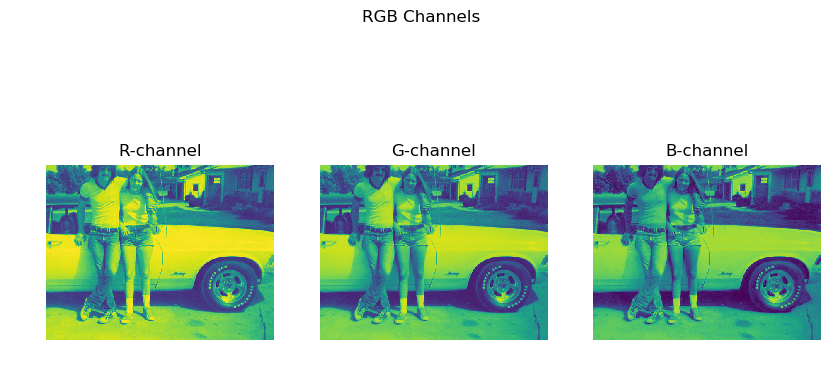

In [28]:
M = cv2.cvtColor(cv2.imread('fff.jpg'), cv2.COLOR_BGR2RGB)
R,G,B = cv2.split(M)

#Details
Imin = np.min(M)
Imax = np.max(M)

plt.style.use('default')
plt.figure(figsize=[10,5])
plt.rcParams['axes.titlesize'] = 12
plt.imshow(M)
plt.axis('off')
plt.title('Original Image')
plt.show()

plt.figure(figsize=[10,5])
plt.rcParams['axes.titlesize'] = 12
plt.suptitle('RGB Channels')
plt.subplot(131)
plt.imshow(R)
plt.axis('off')
plt.title('R-channel')
plt.subplot(132)
plt.imshow(G)
plt.axis('off')
plt.title('G-channel')
plt.subplot(133)
plt.imshow(B)
plt.axis('off')
plt.title('B-channel')
plt.show()

## Output

Contrast Stretched Values
MinR:  0 MaxR:  255
MinG:  0 MaxR:  255
MinB:  0 MaxR:  255


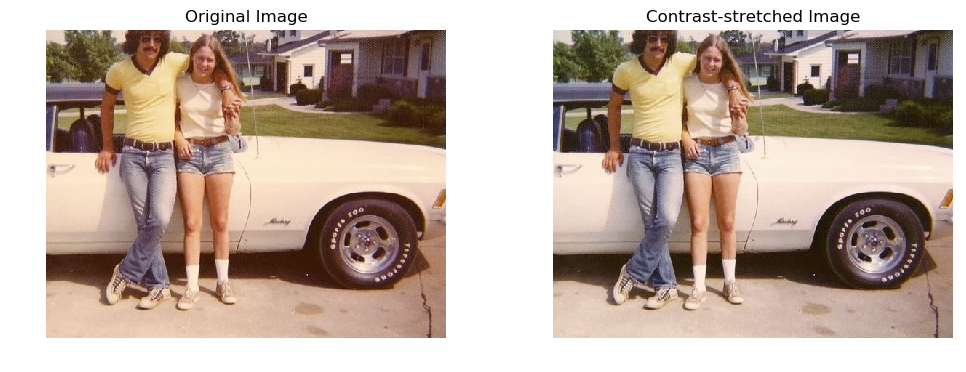

Gray World-treated Values
MinR:  17 MaxR:  213
MinG:  0 MaxR:  253
MinB:  0 MaxR:  255


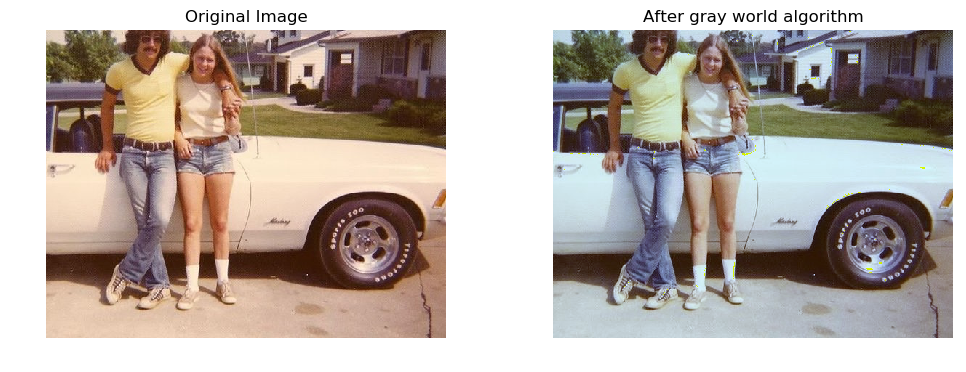

In [40]:
M = cv2.cvtColor(cv2.imread('fff.jpg'), cv2.COLOR_BGR2RGB)
M_str = Contrast_stretched(M)
R1,G1,B1 = cv2.split(M_str)

G_gray = Gray_Algo(M)
R2,G2,B2 = cv2.split(G_gray)

print('Contrast Stretched Values')
print('MinR: ',np.min(R1),'MaxR: ',np.max(R1))
print('MinG: ',np.min(G1),'MaxR: ',np.max(G1))
print('MinB: ',np.min(B1),'MaxR: ',np.max(B1))

plt.style.use('default')
plt.figure(figsize=[12,4])
plt.rcParams['axes.titlesize'] = 12
plt.subplot(121)
plt.imshow(M)
plt.axis('off')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(M_str)
plt.axis('off')
plt.title('Contrast-stretched Image')
plt.show()

print('Gray World-treated Values')
print('MinR: ',np.min(R2),'MaxR: ',np.max(R2))
print('MinG: ',np.min(G2),'MaxR: ',np.max(G2))
print('MinB: ',np.min(B2),'MaxR: ',np.max(B2))

plt.figure(figsize=[12,4])
plt.rcParams['axes.titlesize'] = 12
plt.subplot(121)
plt.imshow(M)
plt.axis('off')
plt.title('Original Image')
plt.subplot(122)
plt.axis('off')
plt.imshow(G_gray)
plt.title('After gray world algorithm')
plt.show()


## White Patch Algorithm

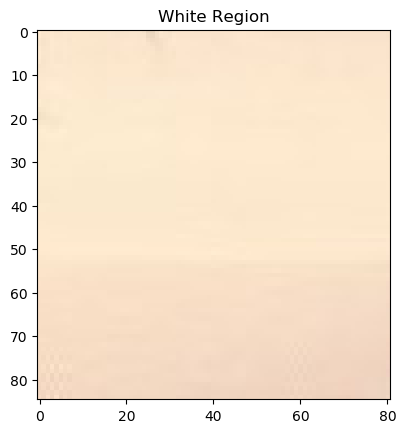

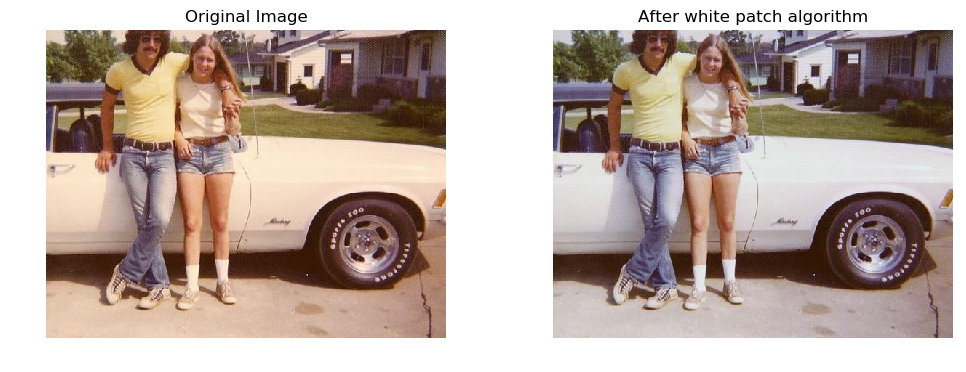

In [38]:
#original image
G_gray = cv2.cvtColor(cv2.imread('fff.jpg'), cv2.COLOR_BGR2RGB)
R,G,B =cv2.split(G_gray)

#white image
M = cv2.cvtColor(cv2.imread('white.jpg'), cv2.COLOR_BGR2RGB)
R1,G1,B1 = cv2.split(M)

F = np.copy(G_gray)
H1 = M.shape[0]
W1 = M.shape[1]
spec_R = np.sum(R1)/(H1*W1)
spec_G = np.sum(G1)/(H1*W1)
spec_B = np.sum(B1)/(H1*W1)
scale = (spec_R+spec_G+spec_B)/3

#white averages for each color channel
R_ave = (np.sum(R1)/(R1.shape[0]*R1.shape[1]))
G_ave = (np.sum(G1)/(G1.shape[0]*G1.shape[1]))
B_ave = (np.sum(B1)/(B1.shape[0]*B1.shape[1]))
#white-balanced channels
R_wb = (R/R_ave)*scale
G_wb = (G/G_ave)*scale
B_wb = (B/B_ave)*scale
F[ : , : , 0] = R_wb
F[ : , : , 1] = G_wb
F[ : , : , 2] = B_wb

plt.style.use('default')
plt.imshow(M)
plt.title('White Region')
plt.show()

plt.figure(figsize=[12,4])
plt.rcParams['axes.titlesize'] = 12
plt.subplot(121)
plt.imshow(G_gray)
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(F)
plt.title('After white patch algorithm')
plt.axis('off')
plt.show()